In [ ]:
###
# Importing libraries
###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score


In [ ]:
RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

In [ ]:
df = pd.read_csv('./07-11 DNN/breast_cancer_mod.csv')

In [ ]:
df.shape

(569, 31)

In [ ]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [ ]:
# .T for transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [ ]:
# printing unique values of each column

for col in df.columns:
    print(f'Col: {col} -- {df[col].unique()}')

Col: mean radius -- [0 1]
Col: mean texture -- [0 1]
Col: mean perimeter -- [0 1]
Col: mean area -- [0 1]
Col: mean smoothness -- [0 1]
Col: mean compactness -- [0 1]
Col: mean concavity -- [0 1]
Col: mean concave points -- [0 1]
Col: mean symmetry -- [0 1]
Col: mean fractal dimension -- [1 0]
Col: radius error -- [0 1]
Col: texture error -- [1 0]
Col: perimeter error -- [0 1]
Col: area error -- [0 1]
Col: smoothness error -- [1 0]
Col: compactness error -- [1 0]
Col: concavity error -- [1 0]
Col: concave points error -- [1 0]
Col: symmetry error -- [1 0]
Col: fractal dimension error -- [1 0]
Col: worst radius -- [0 1]
Col: worst texture -- [0 1]
Col: worst perimeter -- [0 1]
Col: worst area -- [0 1]
Col: worst smoothness -- [1 0]
Col: worst compactness -- [1 0]
Col: worst concavity -- [0 1]
Col: worst concave points -- [0 1]
Col: worst symmetry -- [1 0]
Col: worst fractal dimension -- [1 0]
Col: target -- [0 1]


<BarContainer object of 2 artists>

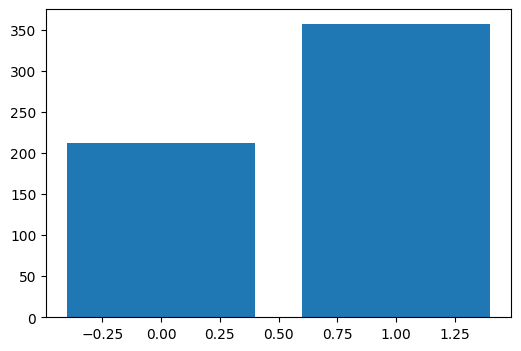

In [ ]:
labels = ['Malignant', 'Benign']

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(df['target'].value_counts().index, 
       df['target'].value_counts().values)

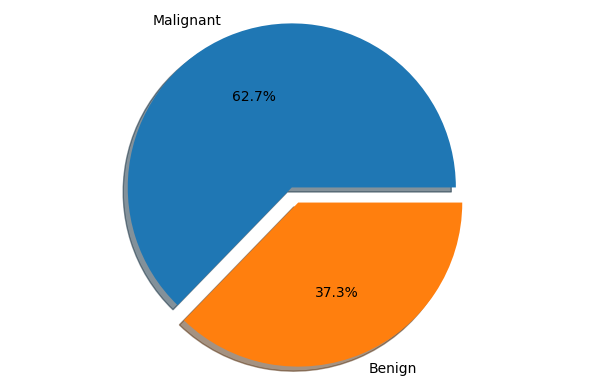

In [ ]:
labels = ['Malignant', 'Benign']

fig, ax = plt.subplots(figsize=(6,4))
explode = (0.0, 0.1)
ax.pie(df['target'].value_counts(), 
       explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

ax.axis('equal')
plt.tight_layout()

In [ ]:
# splitting data into features and labels 
features = df.drop('target', axis=1)
labels = df['target']
type(features), type(labels)
features.shape, labels.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=TEST_SIZE,
                                                    stratify=labels,
                                                    random_state=RANDOM_STATE)

In [ ]:
X_train['total'] = X_train.astype(np.int64).sum(axis=1)
X_train['target'] = y_train
X_train.sort_values('total', inplace=True)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
376,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
345,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
335,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


In [ ]:
# we are not expecting to find exact figure, just a threshold
scores = {}
for i in range(X_train.shape[1]):
    X_train['pred'] = X_train['total']>=i
    scores[i] = accuracy_score(X_train['target'], X_train['pred'])
best_b = max(scores, key=scores.get)
best_b, scores[best_b]

(27, 0.8505494505494505)

In [ ]:
X_test['total'] = X_test.astype(int).sum(axis=1)
X_test['target'] = y_test
X_test['pred'] = X_test['total'] >= best_b
score = accuracy_score(X_test['target'], X_test['pred'])
score

0.868421052631579